In [1]:
import pandas as pd
data=pd.read_csv("C:\\Users\\ACER\\Downloads\\ChatGPT_Reviews.csv")
data.head()

,Review Id,Review,Ratings,Review Date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,8/23/2024 19:30
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,8/23/2024 19:28
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,8/23/2024 19:22
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,8/23/2024 19:20
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,8/23/2024 19:20


In [2]:
data.tail()

,Review Id,Review,Ratings,Review Date
196722,462686ff-e500-413c-a6b4-2badc2e3b21d,Update 2023,5,7/27/2023 16:26
196723,f10e0d48-ecb6-42db-b103-46c0046f9be9,its grear,5,9/23/2023 16:25
196724,df909a49-90b5-4dac-9b89-c4bd5a7c2f75,Funtastic App,5,11/8/2023 13:57
196725,abe43878-973f-4e96-a765-c4af5c7f7b20,hi all,5,7/25/2023 15:32
196726,0151001d-b81c-41b5-8927-f56738989625,expert application,5,11/30/2023 18:11


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196727 entries, 0 to 196726
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Review Id    196727 non-null  object
 1   Review       196721 non-null  object
 2   Ratings      196727 non-null  int64 
 3   Review Date  196727 non-null  object
dtypes: int64(1), object(3)
memory usage: 6.0+ MB


In [4]:
data.isna().sum()

Review Id      0
Review         6
Ratings        0
Review Date    0
dtype: int64

In [5]:
data['Review'] = data['Review'].fillna('No Review')

data.isna().any()

Review Id      False
Review         False
Ratings        False
Review Date    False
dtype: bool

In [6]:
data['Review Date']=pd.to_datetime(data['Review Date'], errors='coerce')
data['Ratings'] = pd.to_numeric(data['Ratings'], errors='coerce')

In [7]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'\s+', ' ', text)                                                                        # Normalize spaces
    text = re.sub(r'[^\w\s]', '', text)                                                                     # Remove punctuation
    text = re.sub(r'\d+', '', text)                                                                         # Remove digits
    text = text.lower()                                                                                     # Convert to lowercase
    words = text.split()                                                                                    # Split into words
    return " ".join([word for word in words if word not in stop_words])                                     # Remove stopwords

data['Cleaned Review'] = data['Review'].apply(preprocess_text)
data.head(6)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Review Id,Review,Ratings,Review Date,Cleaned Review
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:00,good
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:00,good
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:00,nice app
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:00,nice ig
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:00,great app bot accurate anything gives tips gam...
5,9cdc3f78-15cd-4e9d-9287-31bc5af496c4,so nice app,5,2024-08-23 19:18:00,nice app


In [8]:
import pandas as pd
from textblob import TextBlob

def sentiment_categorizer(review):
    polarity = TextBlob(review).sentiment.polarity
    
    # Categorize sentiment based on the polarity score
    if polarity > 0.25:
        return "Positive"
    elif polarity < -0.25:
        return "Negative"
    else:
        return "Neutral"

data['Sentiment'] = data['Cleaned Review'].apply(sentiment_categorizer)


In [9]:
data

,Review Id,Review,Ratings,Review Date,Cleaned Review,Sentiment
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:00,good,Positive
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:00,good,Positive
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:00,nice app,Positive
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:00,nice ig,Positive
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:00,great app bot accurate anything gives tips gam...,Positive
...,...,...,...,...,...,...
196722,462686ff-e500-413c-a6b4-2badc2e3b21d,Update 2023,5,2023-07-27 16:26:00,update,Neutral
196723,f10e0d48-ecb6-42db-b103-46c0046f9be9,its grear,5,2023-09-23 16:25:00,grear,Neutral
196724,df909a49-90b5-4dac-9b89-c4bd5a7c2f75,Funtastic App,5,2023-11-08 13:57:00,funtastic app,Neutral
196725,abe43878-973f-4e96-a765-c4af5c7f7b20,hi all,5,2023-07-25 15:32:00,hi,Neutral


In [10]:
data['Sentiment'].value_counts()

Sentiment
Positive    129334
Neutral      63429
Negative      3964
Name: count, dtype: int64

In [11]:
data['Ratings'].value_counts()

Ratings
5    150215
4     22897
1     12083
3      8157
2      3375
Name: count, dtype: int64

In [12]:
data.dtypes

Review Id                 object
Review                    object
Ratings                    int64
Review Date       datetime64[ns]
Cleaned Review            object
Sentiment                 object
dtype: object

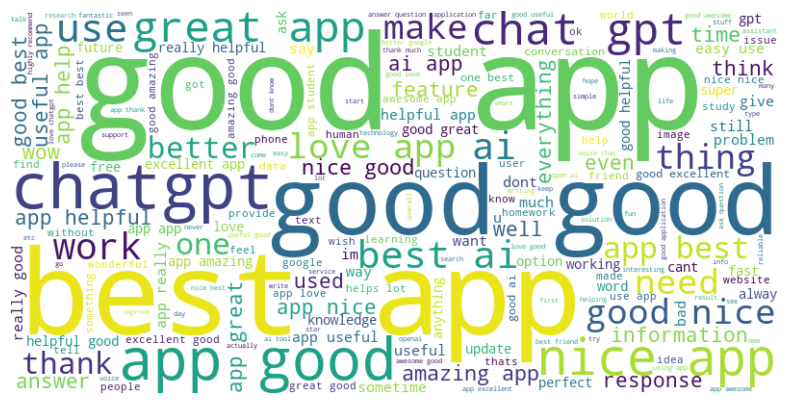

In [13]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

text = ' '.join(data['Cleaned Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.show()

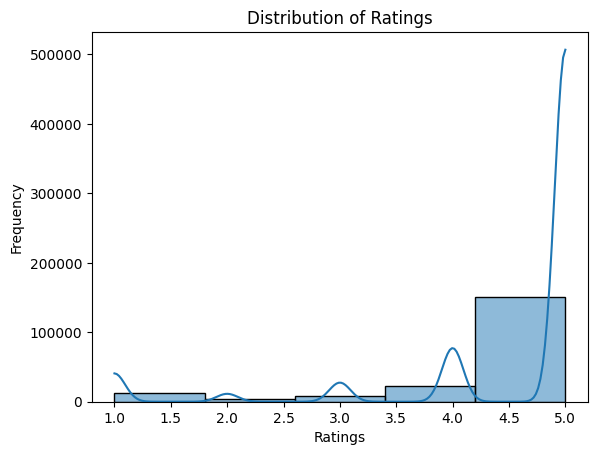

In [14]:
import seaborn as sns

sns.histplot(data['Ratings'], bins=5, kde=True) 
plt.title('Distribution of Ratings')  
plt.xlabel('Ratings')  
plt.ylabel('Frequency')  
plt.show()


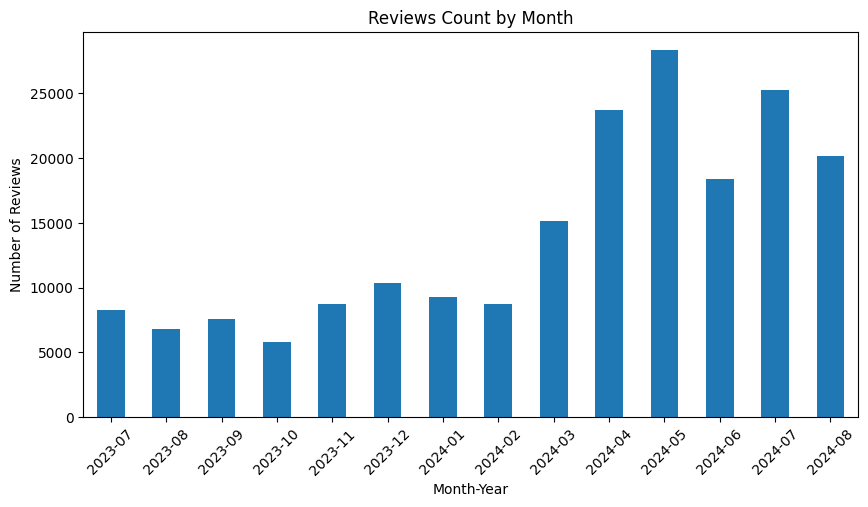

In [15]:
data['Year-Month'] = data['Review Date'].dt.to_period('M')
reviews_by_month = data.groupby('Year-Month').size()

plt.figure(figsize=(10, 5))
reviews_by_month.plot(kind='bar')
plt.title('Reviews Count by Month')
plt.xlabel('Month-Year')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

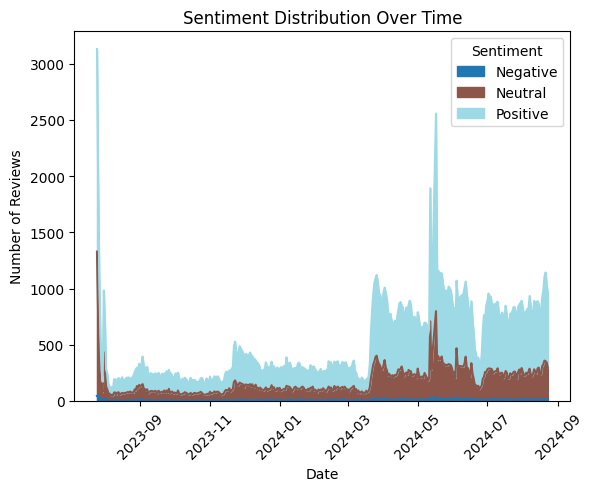

In [16]:
sentiment_over_time = data.groupby([data['Review Date'].dt.date, 'Sentiment']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
sentiment_over_time.plot(kind='area', stacked=True, colormap='tab20')
plt.title('Sentiment Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

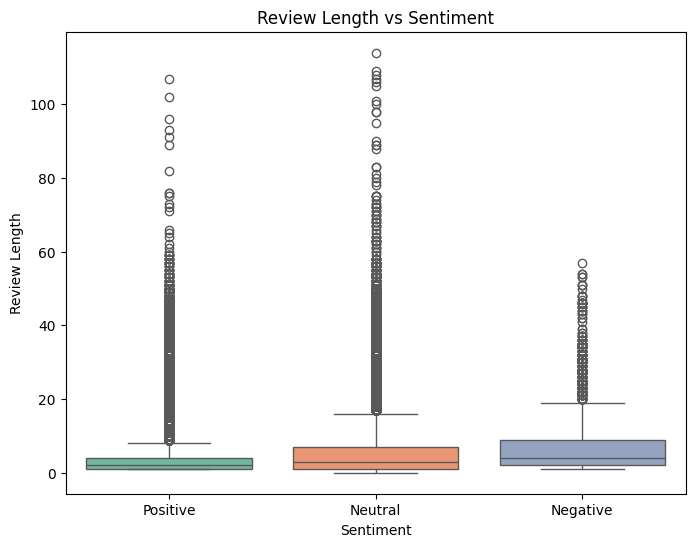

In [17]:
data['Review Length'] = data['Cleaned Review'].apply(lambda x: len(x.split()))

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sentiment', y='Review Length', data=data, hue='Sentiment', palette='Set2')
plt.title('Review Length vs Sentiment')
plt.show()

In [18]:
data.tail()

,Review Id,Review,Ratings,Review Date,Cleaned Review,Sentiment,Year-Month,Review Length
196722,462686ff-e500-413c-a6b4-2badc2e3b21d,Update 2023,5,2023-07-27 16:26:00,update,Neutral,2023-07,1
196723,f10e0d48-ecb6-42db-b103-46c0046f9be9,its grear,5,2023-09-23 16:25:00,grear,Neutral,2023-09,1
196724,df909a49-90b5-4dac-9b89-c4bd5a7c2f75,Funtastic App,5,2023-11-08 13:57:00,funtastic app,Neutral,2023-11,2
196725,abe43878-973f-4e96-a765-c4af5c7f7b20,hi all,5,2023-07-25 15:32:00,hi,Neutral,2023-07,1
196726,0151001d-b81c-41b5-8927-f56738989625,expert application,5,2023-11-30 18:11:00,expert application,Neutral,2023-11,2


In [19]:
data.drop(columns=['Review Id','Review','Review Date','Ratings','Year-Month','Review Length'],inplace=True)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
x = vectorizer.fit_transform(data['Cleaned Review'])

In [21]:
from sklearn.preprocessing import LabelEncoder 
lb = LabelEncoder()
y = lb.fit_transform(data['Sentiment'])

In [22]:
data.head()

,Cleaned Review,Sentiment
0,good,Positive
1,good,Positive
2,nice app,Positive
3,nice ig,Positive
4,great app bot accurate anything gives tips gam...,Positive


In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

models = [
    ("KNN", KNeighborsClassifier()),
    ("XGBClassifier", XGBClassifier(enable_categorical=True)),
    ("DecisionTreeClassifier", DecisionTreeClassifier()),
    ("BernoulliNB", BernoulliNB()),
    ("LogisticRegression", LogisticRegression())
]

for name, model in models:
    model.fit(x_train, y_train)  
    ypred = model.predict(x_test)  
    accuracy = accuracy_score(y_test, ypred)  
    print(f"{name} accuracy score : {accuracy}")


KNN accuracy score : 0.8242515122248767
XGBClassifier accuracy score : 0.9436791541706908
DecisionTreeClassifier accuracy score : 0.9507700909876481
BernoulliNB accuracy score : 0.7412189294972805
LogisticRegression accuracy score : 0.9576068723631372


In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

dtc = DecisionTreeClassifier()

cv_scores = cross_val_score(dtc, x_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-validation scores for DecisionTreeClassifier: {cv_scores}",'\n')
print(f"Average cross-validation accuracy: {cv_scores.mean()}",'\n')

dtc.fit(x_train, y_train)
ypred = dtc.predict(x_test)

print("Confusion matrix :")
print(confusion_matrix(ypred,y_test),'\n')
print("Classification report :")
print(classification_report(ypred,y_test))

Cross-validation scores for DecisionTreeClassifier: [0.94885154 0.95253526 0.9469437  0.94926293 0.95075613] 

Average cross-validation accuracy: 0.9496699145282603 

Confusion matrix :
[[  652   150     0]
 [  123 11694   723]
 [    3   938 25063]] 

Classification report :
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       802
           1       0.91      0.93      0.92     12540
           2       0.97      0.96      0.97     26004

    accuracy                           0.95     39346
   macro avg       0.91      0.90      0.91     39346
weighted avg       0.95      0.95      0.95     39346



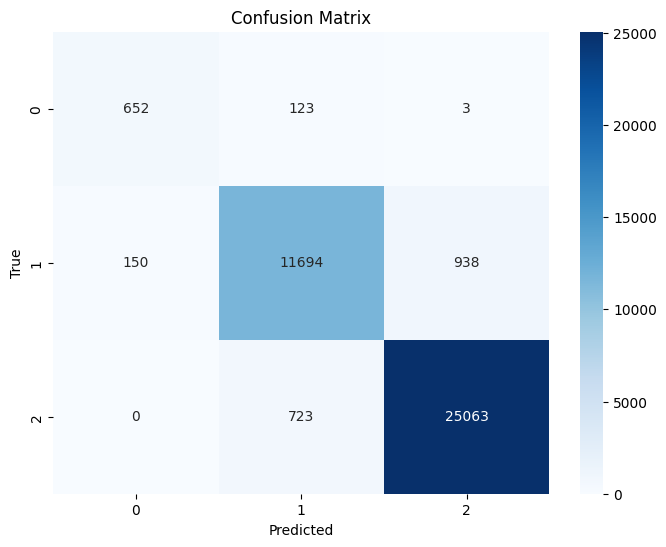

In [26]:
import numpy as np
cm = confusion_matrix(y_test, ypred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [27]:
import joblib

joblib.dump(dtc, 'sentiment_model.pkl')

joblib.dump(vectorizer, 'vectorizer.pkl')

joblib.dump(lb, 'label_encoder.pkl')

['label_encoder.pkl']

In [28]:
def predict_sentiment(new_review):

    new_review_cleaned = preprocess_text(new_review)                                    # Preprocess the review

    review_vectorized = vectorizer.transform([new_review_cleaned])                      # Vectorize text 

    prediction = dtc.predict(review_vectorized)                                         # Predict sentiment

    sentiment = lb.inverse_transform(prediction)                                        # Inverse transform sentiment

    return sentiment[0]  

new_review = "very helpful in my day to day life this tech is like a miracle for me. Thank you so much OPEN AI team for building such a great product."
print(predict_sentiment(new_review)) 


Positive


In [29]:
def predict_sentiment(new_review):
    new_review_cleaned = preprocess_text(new_review)                                    
    review_vectorized = vectorizer.transform([new_review_cleaned])                       
    prediction = dtc.predict(review_vectorized)                                         
    sentiment = lb.inverse_transform(prediction)                                       
    return sentiment[0]  

new_review = "application always give wrong information"
print(predict_sentiment(new_review)) 


Negative
